# Theory


1. What is unsupervised learning in the context of machine learning?

--> Unsupervised Learning: It's a type of machine learning where the model learns patterns from unlabeled data without predefined outcomes. Clustering is a common technique in this setting.

2. How does K-Means clustering algorithm work?

--> K-Means Clustering: It partitions data into K clusters by initializing centroids, assigning points to nearest centroids, and updating centroids until convergence.

3. Explain the concept of a dendrogram in hierarchical clustering.

--> Dendrogram: A tree-like diagram showing the arrangement of clusters produced by hierarchical clustering, useful for visualizing cluster relationships.

4. What is the main difference between K-Means and Hierarchical Clustering?

--> K-Means vs Hierarchical: K-Means is centroid-based and requires a fixed number of clusters, while hierarchical is tree-based and doesn't.

5. What are the advantages of DBSCAN over K-Means?

--> DBSCAN over K-Means:

No need to specify number of clusters

Can find arbitrarily shaped clusters

Handles noise

6. When would you use Silhouette Score in clustering?

--> Silhouette Score: Measures how well a point fits within its cluster compared to others. Used to evaluate cluster quality.

7. What are the limitations of Hierarchical Clustering?

--> Limitations of Hierarchical Clustering:

Computationally expensive

Sensitive to noise/outliers

Once merged or split, can’t undo

8. Why is feature scaling important in clustering algorithms like K-Means?

--> Feature Scaling: Necessary for K-Means because it uses distance-based metrics like Euclidean distance, which can be biased by scale.

9. How does DBSCAN identify noise points?

--> Noise in DBSCAN: Points not belonging to any dense region (i.e., not part of a core or border point) are marked as noise.

10. Define inertia in the context of K-Means.

--> Inertia (K-Means): Sum of squared distances of samples to their nearest cluster center. Lower is better.

11. What is the elbow method in K-Means clustering?

--> Elbow Method: Plot inertia vs. number of clusters. The "elbow" point suggests an optimal number of clusters.

12. Describe the concept of "density in DBSCAN.

--> Density in DBSCAN: A cluster is a dense region with a minimum number of points (min_samples) within a radius (eps).

13. Can hierarchical clustering be used on categorical data?

--> Hierarchical Clustering on Categorical Data: It's limited unless converted using methods like one-hot encoding or similarity metrics.

14. What does a negative Silhouette Score indicate?

--> Negative Silhouette Score: Indicates poor clustering; points may be assigned to the wrong cluster.

15. Explain the term "linkage criteria" in hierarchical clustering.

--> Linkage Criteria: Defines how distances between clusters are calculated. Common types: single, complete, average.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

--> K-Means Poor Performance: When clusters have different sizes/densities, K-Means may incorrectly group points.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

--> DBSCAN Parameters:

eps: Neighborhood radius

min_samples: Minimum number of points to form a dense region

18. How does K-Means++ improve upon standard K-Means initialization?

--> K-Means++: Improves initialization by spreading out initial centroids, leading to better convergence.

19. What is agglomerative clustering?

--> Agglomerative Clustering: A bottom-up hierarchical clustering method that merges pairs of clusters.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

--> Why Silhouette Score > Inertia: Inertia only measures compactness; Silhouette also considers separation between clusters.



# Practical

In [2]:
import warnings
warnings.filterwarnings("ignore")

21. Generate synthetic data with 4 centers using make blobs and apply K-Means clustering. Visualize using a scatter plot.



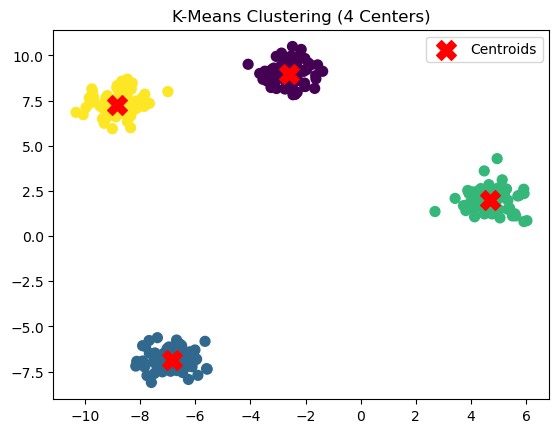

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (4 Centers)")
plt.legend()
plt.show()


22. Load the iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.



In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load data
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# Display first 10 labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.



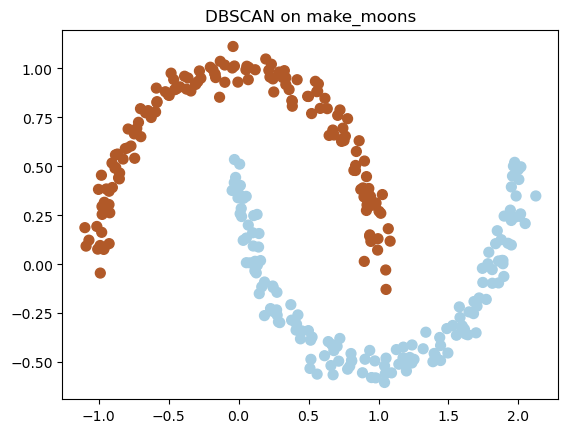

In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Create moons
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', s=50)
plt.title("DBSCAN on make_moons")
plt.show()


24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.



In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load and scale data
data = load_wine()
X = StandardScaler().fit_transform(data.data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Count samples in each cluster
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {0: 65, 1: 51, 2: 62}


25. Use make circles to generate synthetic data and cluster it using DBSCAN. Plot the result.



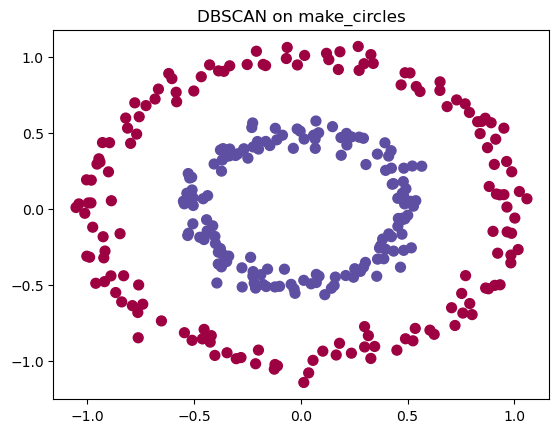

In [7]:
from sklearn.datasets import make_circles

# Generate data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=50)
plt.title("DBSCAN on make_circles")
plt.show()


26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.



In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

# Load and scale data
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Output centroids
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


27. Generate synthetic data using make blobs with varying cluster standard deviations and cluster with DBSCAN.



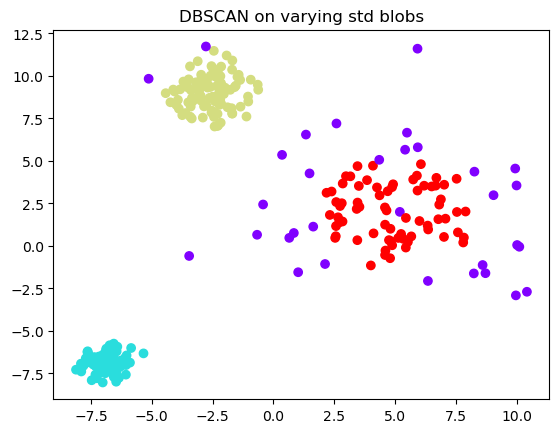

In [9]:
# Varying std devs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# DBSCAN
db = DBSCAN(eps=0.9, min_samples=5).fit(X)
labels = db.labels_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN on varying std blobs")
plt.show()


28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.



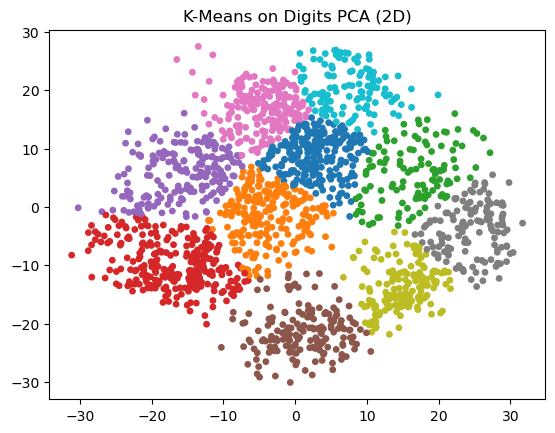

In [10]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load and reduce
digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

# KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=15)
plt.title("K-Means on Digits PCA (2D)")
plt.show()


29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart



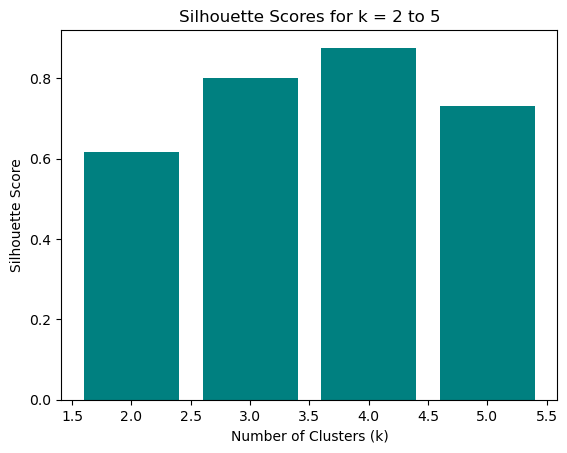

In [11]:
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

scores = []
ks = range(2, 6)
for k in ks:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot
plt.bar(ks, scores, color='teal')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 2 to 5")
plt.show()


30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.




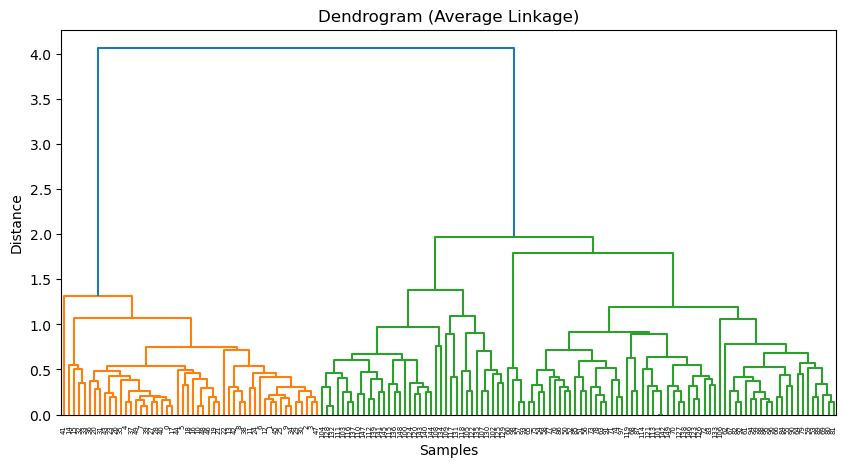

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
iris = load_iris()
Z = linkage(iris.data, method='average')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.



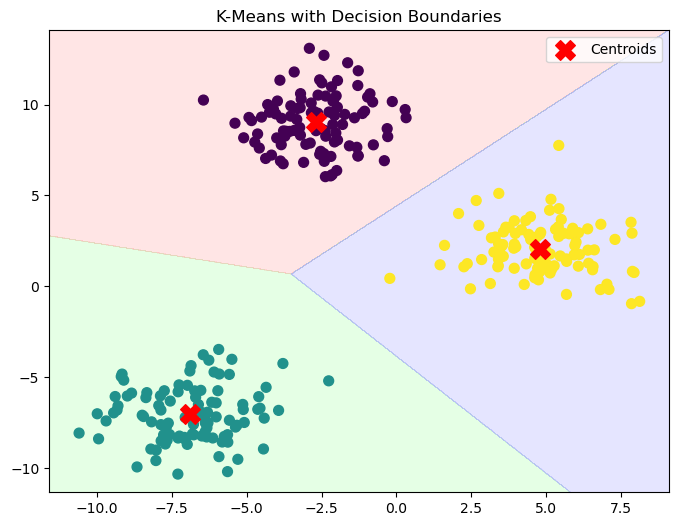

In [13]:
from matplotlib.colors import ListedColormap
import numpy as np

# Generate overlapping blobs
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Mesh for decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means with Decision Boundaries")
plt.legend()
plt.show()


32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.


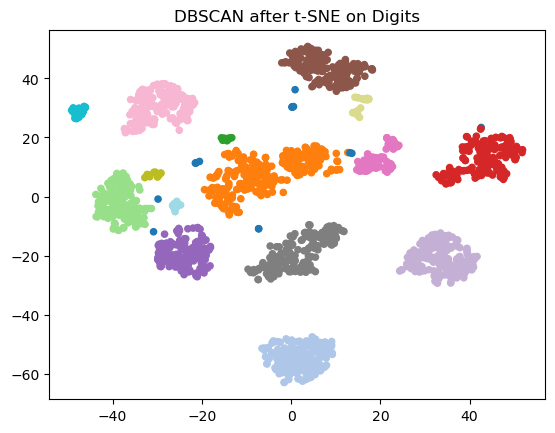

In [14]:
from sklearn.manifold import TSNE

# Reduce dimensions
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

# DBSCAN
db = DBSCAN(eps=3, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=20)
plt.title("DBSCAN after t-SNE on Digits")
plt.show()



33. Generate synthetic data using make blobs and apply Agglomerative Clustering with complete linkage. Plot the result.


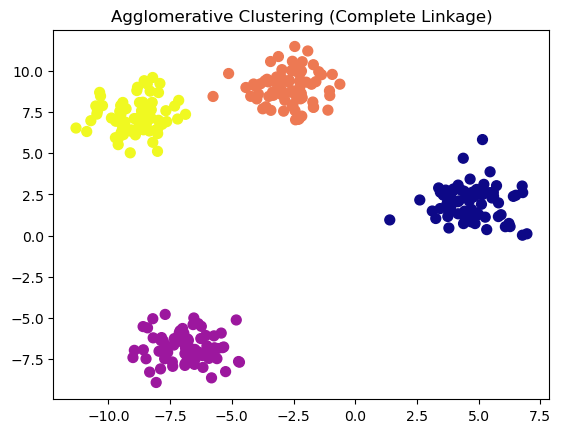

In [15]:
# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Agglomerative
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()



34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.


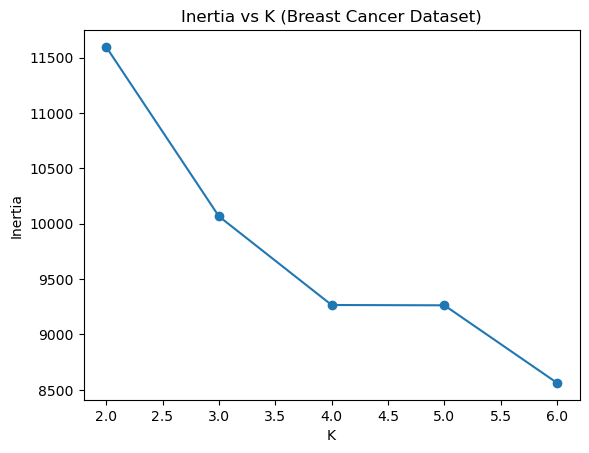

In [16]:
# Load and scale
X = StandardScaler().fit_transform(load_breast_cancer().data)

# Inertia plot
ks = range(2, 7)
inertias = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in ks]

plt.plot(ks, inertias, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Inertia vs K (Breast Cancer Dataset)")
plt.show()



35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.


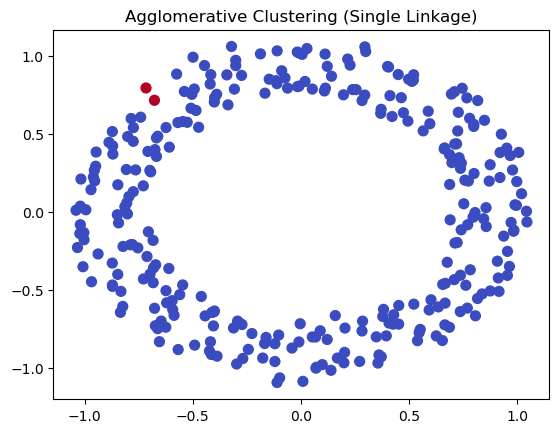

In [17]:
# Generate data
X, _ = make_circles(n_samples=300, noise=0.05)

# Agglomerative
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=50)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.show()



36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)


In [18]:
# Load and scale
X = StandardScaler().fit_transform(load_wine().data)

# DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X)

# Count clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0



37. Generate synthetic data with make blobs and apply KMeans. Then plot the cluster centers on top of the data points.


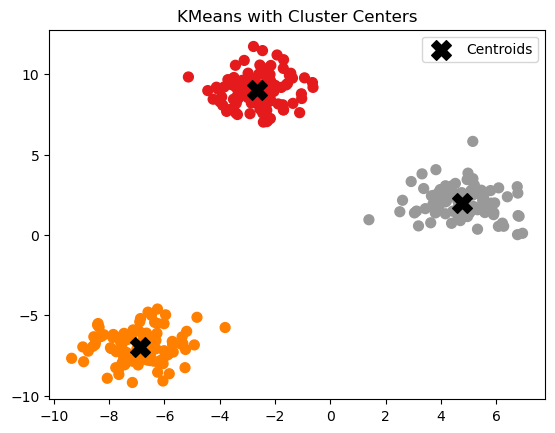

In [19]:
# Data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("KMeans with Cluster Centers")
plt.legend()
plt.show()



38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.


In [20]:
# Load and scale
X = StandardScaler().fit_transform(load_iris().data)

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

# Count noise
noise_count = list(labels).count(-1)
print("Number of noise samples:", noise_count)


Number of noise samples: 34



39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result


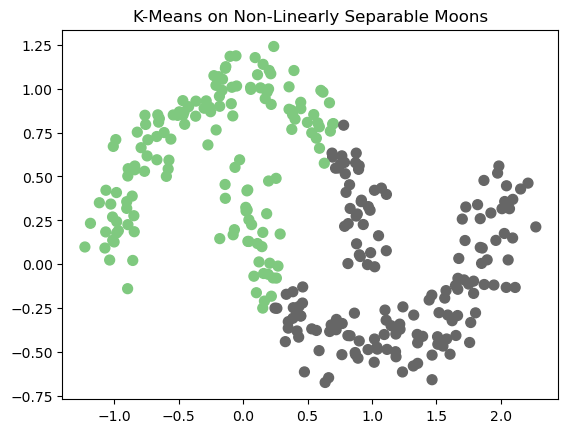

In [21]:
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("K-Means on Non-Linearly Separable Moons")
plt.show()



40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.


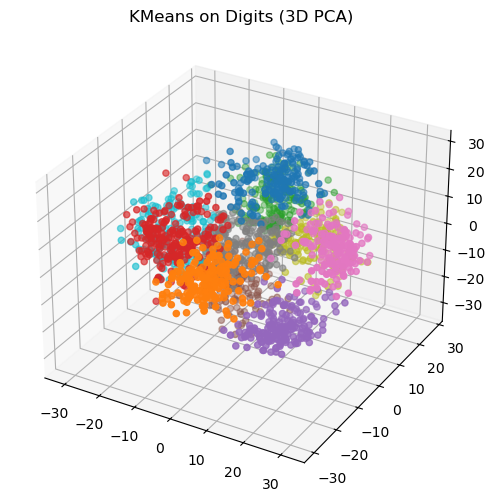

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D
X = PCA(n_components=3).fit_transform(load_digits().data)

# KMeans
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)

# 3D Scatter
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='tab10', s=20)
ax.set_title("KMeans on Digits (3D PCA)")
plt.show()



41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.


In [23]:
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.678738720085253



42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.


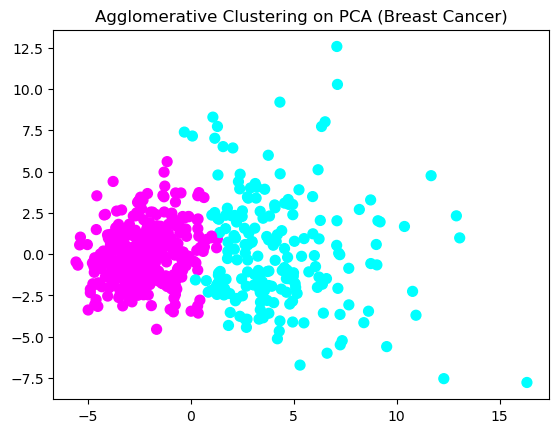

In [24]:
X = StandardScaler().fit_transform(load_breast_cancer().data)
X_pca = PCA(n_components=2).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='cool', s=50)
plt.title("Agglomerative Clustering on PCA (Breast Cancer)")
plt.show()



43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.


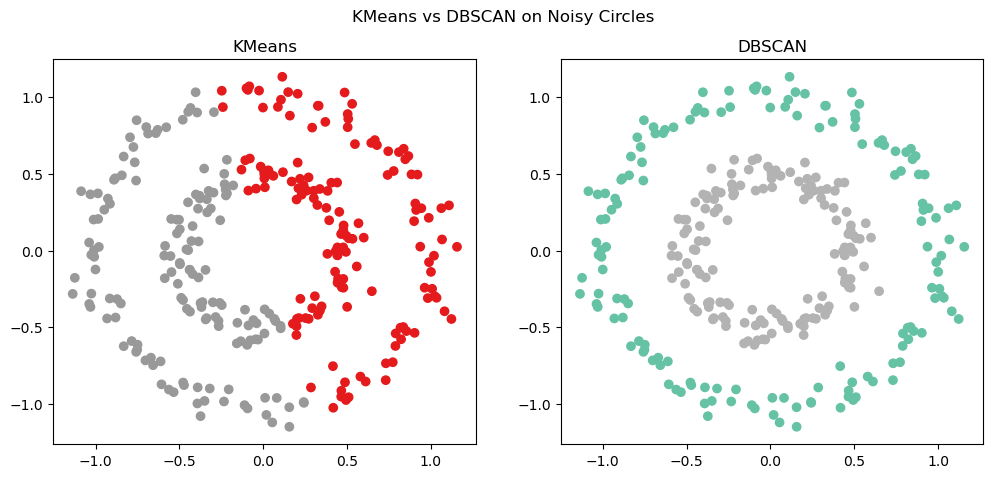

In [25]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.07)

kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans, cmap='Set1')
plt.title("KMeans")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan, cmap='Set2')
plt.title("DBSCAN")

plt.suptitle("KMeans vs DBSCAN on Noisy Circles")
plt.show()



44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.


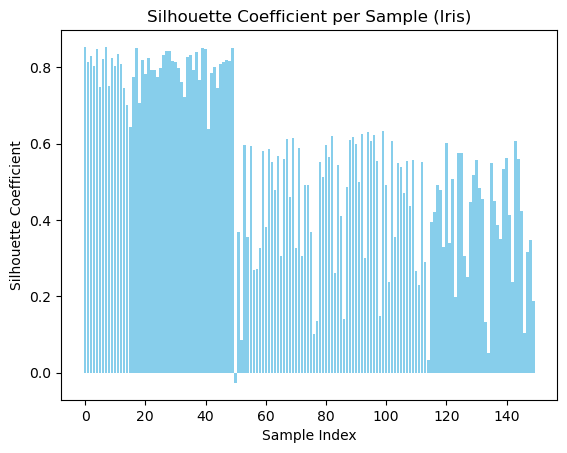

In [26]:
from sklearn.metrics import silhouette_samples

X = load_iris().data
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sample_scores = silhouette_samples(X, labels)

plt.bar(range(len(X)), sample_scores, color='skyblue')
plt.title("Silhouette Coefficient per Sample (Iris)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()



45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average linkage. Visualize clusters.


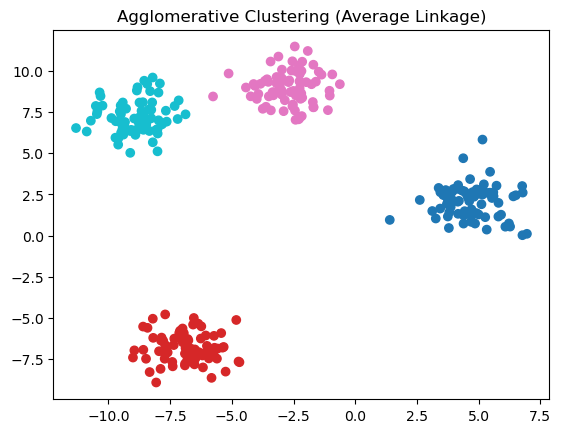

In [27]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

labels = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()



46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).
x

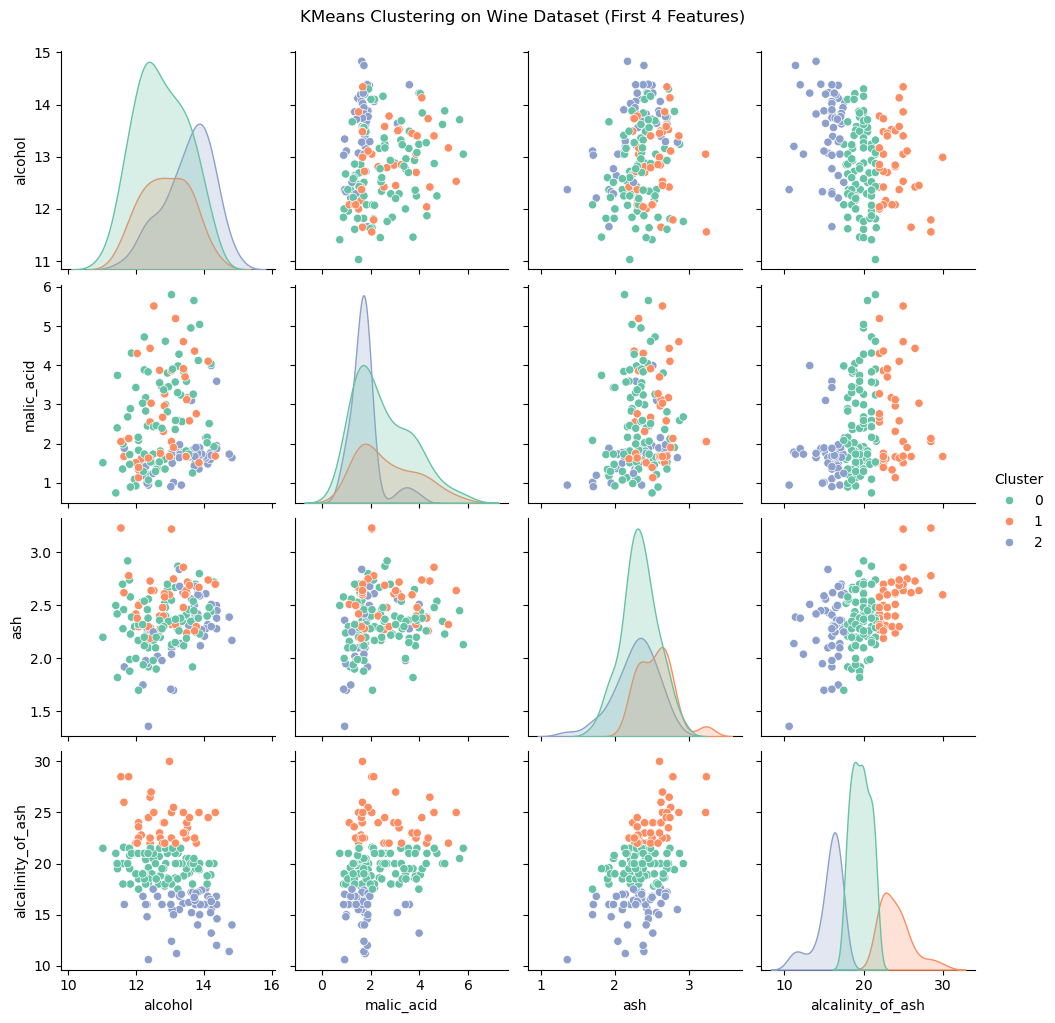

In [28]:
import pandas as pd
import seaborn as sns

wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])

# KMeans
labels = KMeans(n_clusters=3, random_state=42).fit_predict(df)
df['Cluster'] = labels

# Pairplot
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()

47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [29]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

db = DBSCAN(eps=1.0, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Clusters found: {n_clusters}, Noise points: {n_noise}")


Clusters found: 3, Noise points: 29




48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

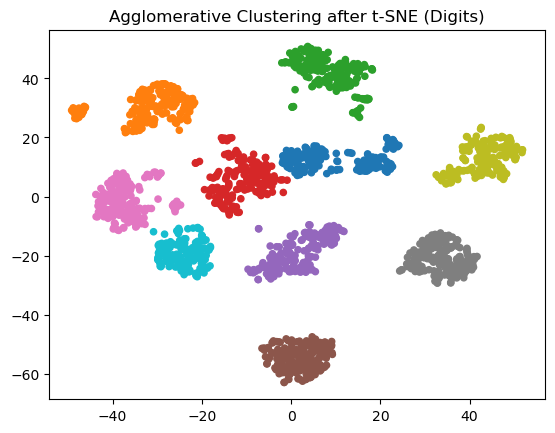

In [30]:
X = TSNE(n_components=2, random_state=42).fit_transform(load_digits().data)

labels = AgglomerativeClustering(n_clusters=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=20)
plt.title("Agglomerative Clustering after t-SNE (Digits)")
plt.show()
